In [6]:
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt

data = pd.read_csv('dataset.csv')

X = data.drop('label', axis=1).values
y = data['label'].values


In [7]:
def train_test_split_custom(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    
    X = X[indices]
    y = y[indices]
    
    split_index = int((1 - test_size) * len(X))
    
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2, random_state=42)

In [10]:
class CustomKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self.prediction(x) for x in X_test]
        return np.array(predictions)

    def prediction(self, x):
        distances = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_neighbor_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

knn = CustomKNN(k=10)
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)

conf_matrix = np.zeros((10, 10), dtype=int)

for true, pred in zip(y_test, y_pred):
    conf_matrix[true, pred] += 1

precision = np.zeros(10)
recall = np.zeros(10)
f1_score = np.zeros(10)

for i in range(10):
    TP = conf_matrix[i, i]
    FP = np.sum(conf_matrix[:, i]) - TP
    FN = np.sum(conf_matrix[i, :]) - TP
    TN = np.sum(conf_matrix) - (TP + FP + FN)

    # Precision and recall
    precision[i] = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall[i] = TP / (TP + FN) if (TP + FN) != 0 else 0

    # F1-score
    f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) != 0 else 0

accuracy = np.sum(y_pred == y_test) / len(y_test)

macro_precision = np.mean(precision)
macro_recall = np.mean(recall)
macro_f1_score = np.mean(f1_score)

support = np.array([np.sum(y_test == i) for i in range(10)])
weighted_precision = np.sum(precision * support) / np.sum(support)
weighted_recall = np.sum(recall * support) / np.sum(support)
weighted_f1_score = np.sum(f1_score * support) / np.sum(support)

results = {
    'Metric': ['Accuracy', 'Macro-Precision', 'Macro-Recall', 'Macro-F1-Score',
               'Weighted-Precision', 'Weighted-Recall', 'Weighted-F1-Score'],
    'Score': [accuracy * 100, macro_precision * 100, macro_recall * 100, macro_f1_score * 100,
              weighted_precision * 100, weighted_recall * 100, weighted_f1_score * 100]
}

df_results = pd.DataFrame(results)


print("Confusion Matrix:")
print(conf_matrix)
print("\nAnalysis:")
print(df_results)

Confusion Matrix:
[[21  0  0  0  0  0  1  0  0  2]
 [ 0 16  0  0  0  0  0  1  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0  1 17  0  0  0  0  0  0]
 [ 0  1  0  0 14  0  0  5  1  1]
 [ 0  0  0  0  0 22  0  0  0  0]
 [ 0  1  0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0  0  0 27  0  0]
 [ 0  0  1  0  0  0  2  0 19  1]
 [ 0  0  0  0  0  0  0  0  0 11]]

Analysis:
               Metric      Score
0            Accuracy  91.000000
1     Macro-Precision  91.328283
2        Macro-Recall  91.605715
3      Macro-F1-Score  90.614341
4  Weighted-Precision  92.316919
5     Weighted-Recall  91.000000
6   Weighted-F1-Score  90.819111


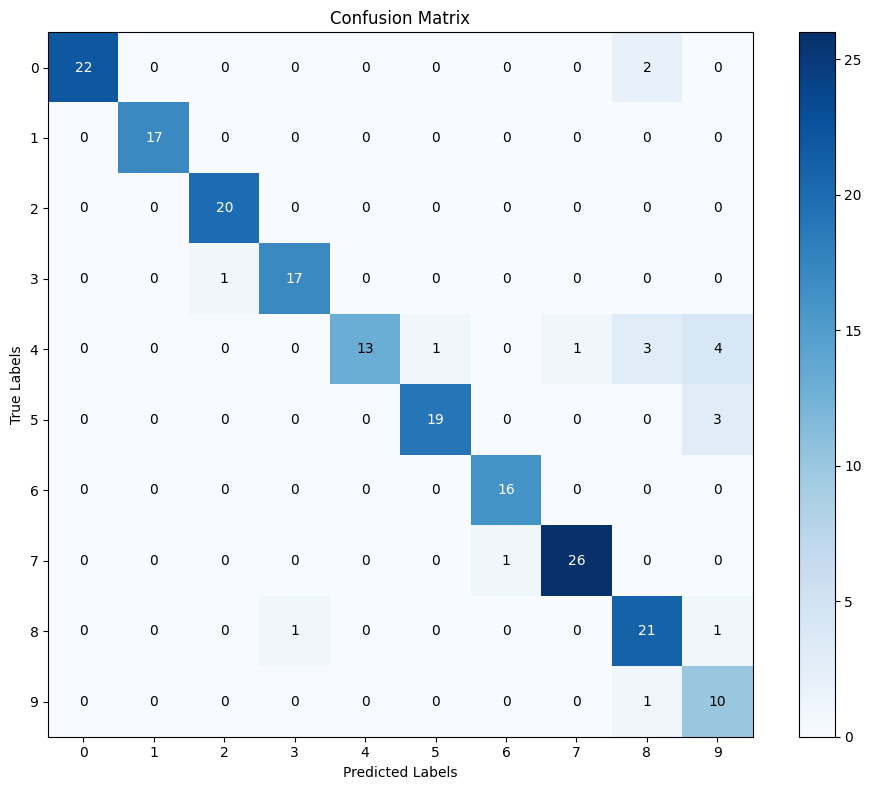

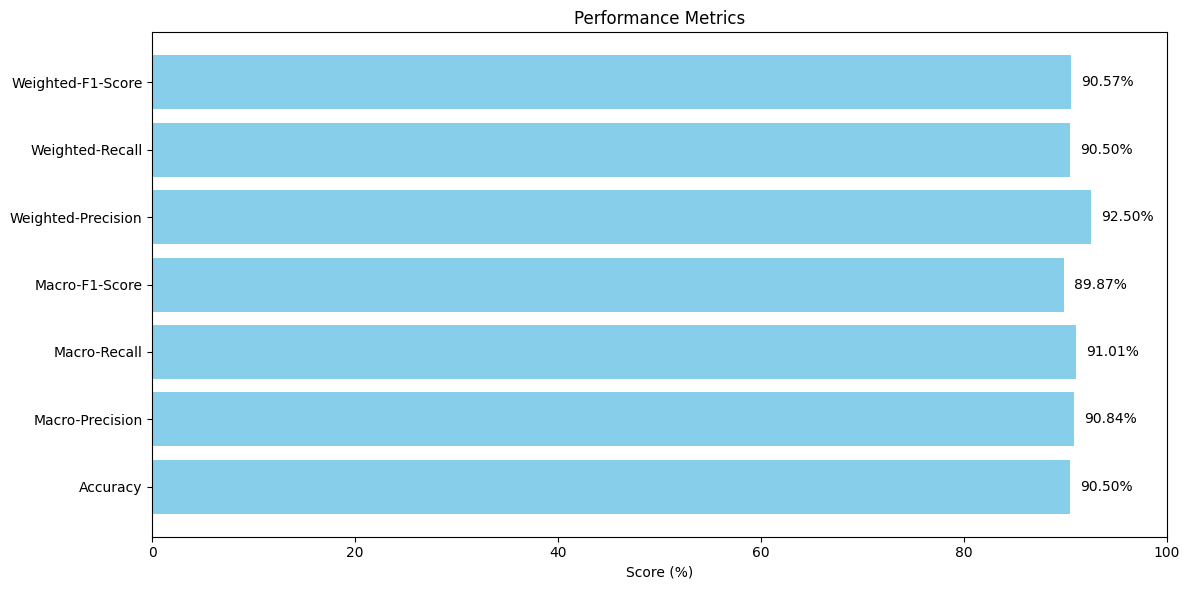

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.tight_layout()
plt.show()

metrics = ['Accuracy', 'Macro-Precision', 'Macro-Recall', 'Macro-F1-Score',
           'Weighted-Precision', 'Weighted-Recall', 'Weighted-F1-Score']
scores = [accuracy * 100, macro_precision * 100, macro_recall * 100, macro_f1_score * 100,
          weighted_precision * 100, weighted_recall * 100, weighted_f1_score * 100]

plt.figure(figsize=(12, 6))
plt.barh(metrics, scores, color='skyblue')
plt.title("Performance Metrics")
plt.xlabel("Score (%)")
plt.xlim(0, 100)

for i, score in enumerate(scores):
    plt.text(score + 1, i, f"{score:.2f}%", va='center')

plt.tight_layout()
plt.show()


In [24]:
import joblib

joblib.dump(knn, 'model/digit_recognizer_3')


['model/digit_recognizer_3']

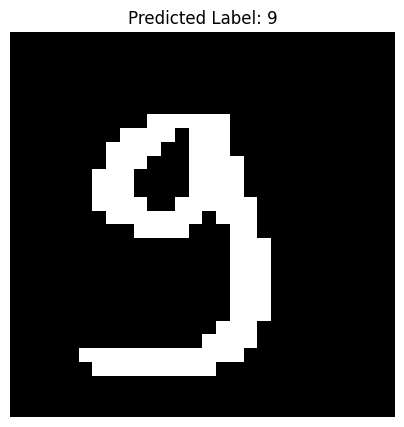

In [13]:
idx = 1
img = X_test[idx].reshape(28, 28)
predicted_label = knn.prediction(X_test[idx])
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()


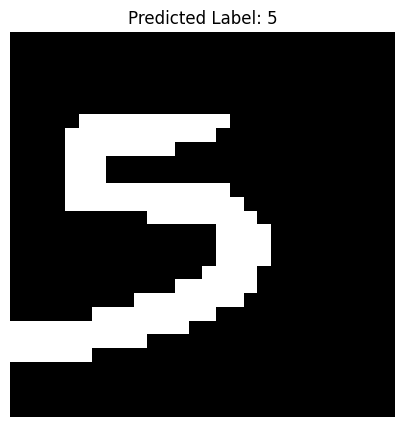

In [14]:
idx = 2
img = X_test[idx].reshape(28, 28)
predicted_label = knn.prediction(X_test[idx])
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()


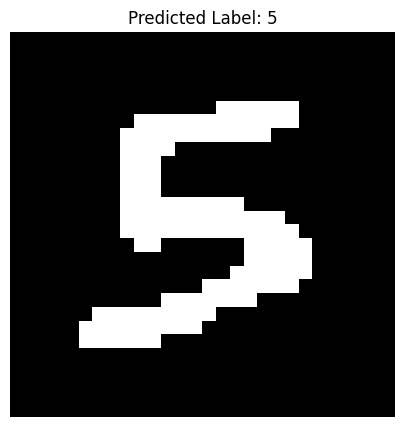

In [19]:
idx = 8
img = X_test[idx].reshape(28, 28)
predicted_label = knn.prediction(X_test[idx])
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()


In [ ]:
import joblib
import cv2
import numpy as np
import pyscreenshot as ImageGrab
import time

model = joblib.load("model/digit_recognizer_3")
image_folder = "./img/"

while True:

    img = ImageGrab.grab(bbox=(60, 470, 400, 870))
    img.save(image_folder + "img.png")
    

    im = cv2.imread(image_folder + "img.png")
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)

    _, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28, 28), interpolation=cv2.INTER_AREA)
 
    roi = roi / 255.0
    X = roi.flatten()  

    predictions = model.predict([X])
    print("Prediction:", predictions[0])

    cv2.putText(im, f"Prediction: {predictions[0]}", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow("Result", im)

    time.sleep(5)

    if cv2.waitKey(1) == 13:
        break

cv2.destroyAllWindows()


Prediction: 4
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 2
Prediction: 2
Prediction: 1
Prediction: 9
Prediction: 9
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 7
Prediction: 7
Prediction: 7
Prediction: 7
Prediction: 1
Prediction: 7
Prediction: 7
Prediction: 7
Prediction: 7
Prediction: 7
Prediction: 7
Prediction: 6
Prediction: 6
Prediction: 4
Prediction: 4
Prediction: 4
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1


KeyboardInterrupt: 

: 